In [94]:
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerTuple
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [2]:
global_eff_auc_df = pd.read_csv('../glob_eff_auc_df.csv')
mean_degree_auc_df = pd.read_csv('../mean_degree_auc_df.csv')

In [3]:
global_eff_auc_df.loc[global_eff_auc_df['group'] == 'hc', 'timepoint'] = 'HC'
mean_degree_auc_df.loc[mean_degree_auc_df['group'] == 'hc', 'timepoint'] = 'HC'

In [77]:

palette = sns.color_palette(['#f61067', '#049b9a', '#012D98', '#a76dfe'], n_colors=4)
print(palette)
palette

[(0.9647058823529412, 0.06274509803921569, 0.403921568627451), (0.01568627450980392, 0.6078431372549019, 0.6039215686274509), (0.00392156862745098, 0.17647058823529413, 0.596078431372549), (0.6549019607843137, 0.42745098039215684, 0.996078431372549)]


[(0.9647058823529412, 0.06274509803921569, 0.403921568627451),
 (0.01568627450980392, 0.6078431372549019, 0.6039215686274509),
 (0.00392156862745098, 0.17647058823529413, 0.596078431372549),
 (0.6549019607843137, 0.42745098039215684, 0.996078431372549)]

In [97]:
color1_alpha1 = (0.9647058823529412, 0.06274509803921569, 0.403921568627451, 1)
color1_alpha01 = (0.9647058823529412, 0.06274509803921569, 0.403921568627451, 0.1)

color2_alpha1 = (0.01568627450980392, 0.6078431372549019, 0.6039215686274509, 1)
color2_alpha01 = (0.01568627450980392, 0.6078431372549019, 0.6039215686274509, 0.1)

color3_alpha1 = (0.00392156862745098, 0.17647058823529413, 0.596078431372549, 1)
color3_alpha01 = (0.00392156862745098, 0.17647058823529413, 0.596078431372549, 0.1)

color4_alpha1 = (0.6549019607843137, 0.42745098039215684, 0.996078431372549, 1)
color4_alpha01 = (0.6549019607843137, 0.42745098039215684, 0.996078431372549, 0.1)

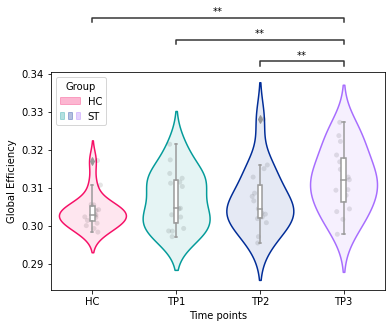

In [102]:
from matplotlib.collections import PolyCollection

ax = sns.violinplot(x="timepoint", y="glob_eff_auc", alpha=0.1,
                    hue="group",
                    data=global_eff_auc_df, palette=palette,
                 dodge=False, inner=None)

# change alpha for edges and faces
ax.collections[0].set_edgecolor(color1_alpha1)
ax.collections[0].set_facecolor(color1_alpha01)
ax.collections[1].set_edgecolor(color2_alpha1)
ax.collections[1].set_facecolor(color2_alpha01)
ax.collections[2].set_edgecolor(color3_alpha1)
ax.collections[2].set_facecolor(color3_alpha01)
ax.collections[3].set_edgecolor(color4_alpha1)
ax.collections[3].set_facecolor(color4_alpha01)

ax = sns.stripplot(x="timepoint", y="glob_eff_auc", color="k", alpha=0.1, size=5, data=global_eff_auc_df,
                   jitter=True, zorder=2)

ax = sns.boxplot(x="timepoint", y="glob_eff_auc", data=global_eff_auc_df, color='white', width=0.05,
                 dodge=False, boxprops={"zorder": 3}, zorder=4)

ax.set_xticklabels(['HC', 'TP1', 'TP2', 'TP3'])
ax.set_xlabel('Time points')
ax.set_ylabel('Global Efficiency')

hc_patch = mpatches.Patch(color=(0.9647058823529412, 0.06274509803921569, 0.403921568627451, 0.3))
tp1_patch = mpatches.Patch(color=(0.01568627450980392, 0.6078431372549019, 0.6039215686274509, 0.3))
tp2_patch = mpatches.Patch(color=(0.00392156862745098, 0.17647058823529413, 0.596078431372549, 0.3))
tp3_patch = mpatches.Patch(color=(0.6549019607843137, 0.42745098039215684, 0.996078431372549, 0.3))
ax.legend([hc_patch, (tp1_patch, tp2_patch, tp3_patch)], ['HC', 'ST'], title="Group",
          handler_map={tuple: HandlerTuple(ndivide=None)})

ax2, _ = add_stat_annotation(ax, data=global_eff_auc_df, x="timepoint", y="glob_eff_auc",
                    order=['HC', 'TP1', 'TP2', 'TP3'],
                   # text_annot_custom=["0.0017", "0.0017", "0.006"],
                   box_pairs=[('TP2', 'TP3'), ("TP1", "TP3"), ("HC", "TP3")],
                   perform_stat_test=False, pvalues=[0.0017, 0.0017, 0.006],
                   loc='outside', verbose=0)

fig = ax2.get_figure()

plt.show()

In [103]:
fig.savefig('glob_eff_auc_evolution_alternate_color_scheme.svg', bbox_inches="tight", format='svg', dpi=1200)

In [ ]:
ax = sns.boxplot(x="timepoint", y="mean_degree_auc", hue="group", data=mean_degree_auc_df, palette="Set3",
                 dodge=False)
ax.set_xticklabels(['HC', 'TP1', 'TP2', 'TP3'])
ax.set_xlabel('Time points')
ax.set_ylabel('Mean Degree AUC')
ax.legend(ax.get_legend_handles_labels()[0], ['HC', 'ST'], title="Group")


fig = ax.get_figure()
plt.show()

In [57]:
fig.savefig('mean_degree_auc_evolution.svg', format='svg', dpi=1200)


In [58]:
mean_degree_and_gEff_auc_df = pd.merge(global_eff_auc_df, mean_degree_auc_df, on=["subject", "timepoint", "group"])


In [61]:
ax = sns.catplot(x="timepoint", y=["mean_degree_auc", "glob_eff_auc"], hue="group", data=mean_degree_and_gEff_auc_df, palette="Set3")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

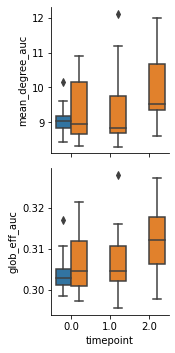

In [68]:
g = sns.PairGrid(mean_degree_and_gEff_auc_df,
                 y_vars=["mean_degree_auc", "glob_eff_auc"], x_vars=['timepoint'], hue="group")
g.map(sns.boxplot)
